## Nama Anggota Kelompok

## JOBDESK

## Penjelasan dataset

## Penjelasan project

## Table of Content

## IMPORT LIBRARY

In [44]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpig
import numpy as np
import seaborn as sns
import os
from keras_preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers

## DATA COLLECTING

## Read Data

In [61]:
train_path = r'./Dataset/train' #train (data latih)
val_path = r'./Dataset/val' #validation (validasi untuk data latih)
test_path = r'./Dataset/test' #test (data testing untuk menguji model)

## DATA PREPROCESSING

## Augmented Data

In [62]:
#mengenerate data image dari sebuah file/folder. pada bagian ini kita dapat menentukan generator/augmentasi seperti apa yang dapat dilakukan.

In [63]:
image_path= r'./Dataset'
train_datagen = ImageDataGenerator(
    image_path,
    rescale=1./255, #nilai yang dengannya kita akan mengalikan data sebelum pemrosesan lainnya. antara 0 dan 1
    horizontal_flip = True, #membalik separuh gambar secara acak
    rotation_range= 30, #nilai dalam derajat (0-180), rentang untuk memutar gambar secara acak
    shear_range=.2, #menerapkan transformasi geser secara acak dengan skala 0.2
    zoom_range=.2, #menerapkan transformasi geser secara acak dengan range 0.2
    fill_mode='nearest' #strategi yang digunakan untuk mengisi piksel yang baru dibuat, yang dapat muncul setelah rotasi atau pergeseran lebar/tinggi.
    
)

val_datagen = ImageDataGenerator(
    image_path,
    rescale=1./255, 
)

test_datagen = ImageDataGenerator(
    image_path,
    rescale=1./255, 
)


## Load Data

In [64]:
#mendefinisikan darimana sumber datanya berasal

In [65]:
train_generator = train_datagen.flow_from_directory(
    train_path, #mengarahkan ke directory train
    target_size = (150,150), #semua gambar akan diubah ukurannya menjadi 150x150
    shuffle=True, #akan mengacak data. Bawaan: Benar. Jika disetel ke False, urutkan data dalam urutan alfanumerik.
    batch_size = 32, #ukuran kumpulan data
    class_mode ='binary' # berarti bahwa label (hanya boleh ada 2)
    
)

val_generator = val_datagen.flow_from_directory(
    val_path, #mengarahkan ke directory val
    target_size = (150,150),
    shuffle=True,
    batch_size = 32,
    class_mode ='binary'
    
)

test_generator = test_datagen.flow_from_directory(
    test_path, #mengarahkan ke directory test
    target_size = (150,150),
    shuffle=True,
    batch_size = 32,
    class_mode ='binary'
    
)



Found 1400 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


## DATA ANALYSIS DAN VISUALIZATION

(32, 150, 150, 3)


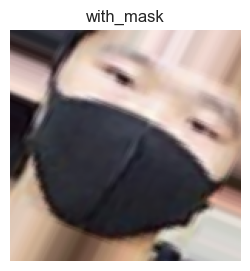

(32, 150, 150, 3)


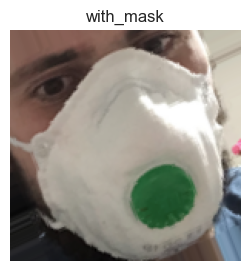

(32, 150, 150, 3)


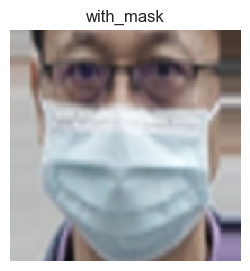

(32, 150, 150, 3)


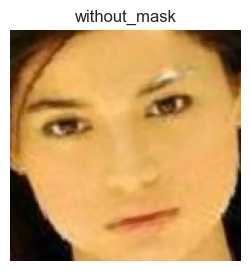

(32, 150, 150, 3)


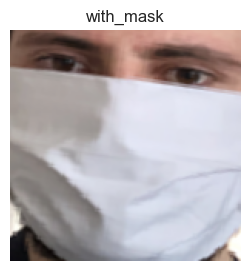

(32, 150, 150, 3)


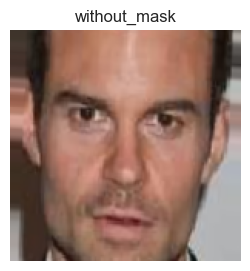

(32, 150, 150, 3)


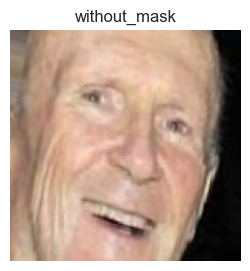

(32, 150, 150, 3)


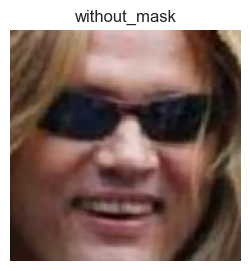

(32, 150, 150, 3)


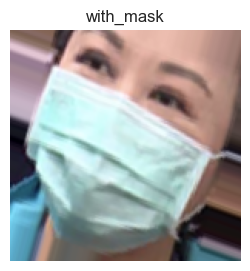

(32, 150, 150, 3)


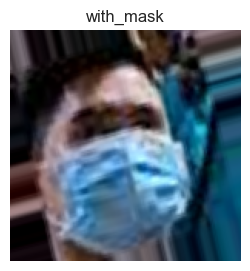

In [120]:
for i in range(10): #perulangan dengan menampilkan hanya 5 gambar
    img, label = train_generator.next()
    print(img.shape)
    plt.figure(figsize=(3, 3))
    plt.imshow(img[0])
    if(label[0] == 0.0):
        plt.title("with_mask")
    else:
        plt.title("without_mask")
    plt.axis("Off") #menghilangkan grid
    plt.show() #menampilkan gambar

In [67]:
#menampikan visualisasi jumlah data dari 2 class

In [68]:
label_name= ['with_mask','without_mask']

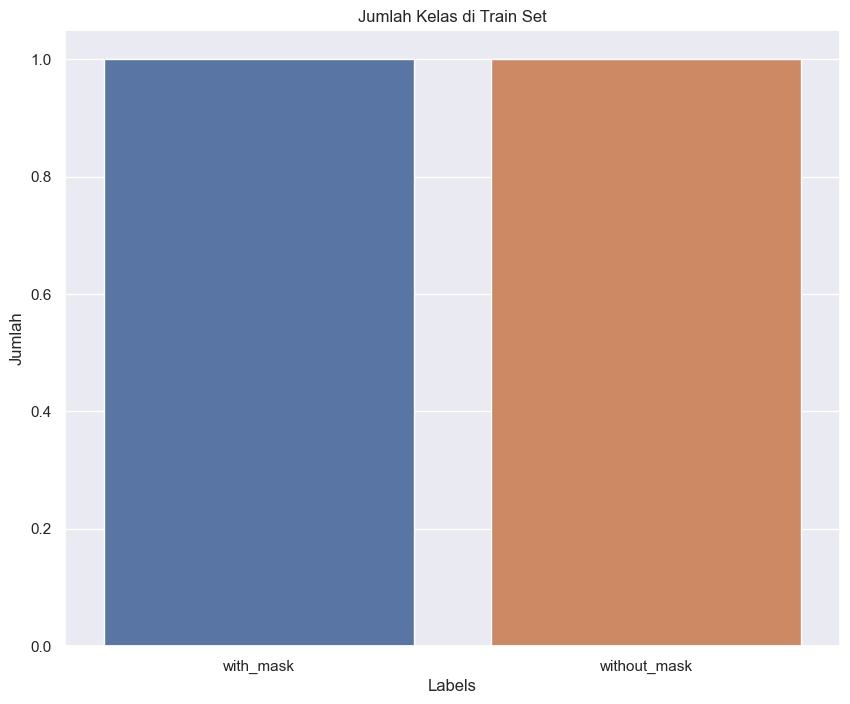

In [69]:
plt.figure(figsize=(10, 8))
sns.set_theme()

sns.countplot(x=label_name)
plt.xlabel('Labels')
plt.ylabel('Jumlah')
plt.title('Jumlah Kelas di Train Set')
plt.show()

## MODELLING

In [70]:
#Model sequential atau model yang berurutan adalah bentuk model yang paling umum digunakan dalam membuat DNN.

In [71]:
model = tf.keras.Sequential([ #langkah kompleks konvolusi nya dengan satu baris kode
    tf.keras.layers.Conv2D(8, (3,3), activation='relu', input_shape=(150,150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')

])

#LINE 2
#parameter pertama (8) adalah nilai filter nya
#parameter kedua dimensi filter nya
#parameter ketiga adalah fungsi aktivasi yang kita gunakan (relu) disini kita menggunakan rectifier function.
#parameter keempat cukup self explained disini yakni bentuk input nya dan tipe nya (RGB atau Black/white)

In [72]:
model.summary() #melihat keseluruhan network model yang sudah dibuat diatas

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 8)       224       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 8)        0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 43808)             0         
                                                                 
 dense_3 (Dense)             (None, 1)                 43809     
                                                                 
Total params: 44,033
Trainable params: 44,033
Non-trainable params: 0
_________________________________________________________________


In [73]:
#Compile model (meyusun model menjadi siap dilakukan proses training)

In [74]:
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(), #merupakan metode optimasi yang digunakan.
    loss=tf.keras.losses.binary_crossentropy, #adalah metode pengukuran nilai loss berdasarkan pada nilai apa. karena Membuat flow datanya kita menggunakan binary sehingga pada nilai loss ini kita juga menggunakan binary loss.
    metrics=['accuracy'] #nilai matriks yang diukur pada project ini kita menggunakan nilai akurasi sebagai nilai pengukurannya
)

In [75]:
#Proses Training Model
#merupakan proses dimana machine learning bekerja sehingga algoritma yang sudah kita definisikan dapat mengingat pola dari masing masing kelas pada data yang kita train

In [76]:
history = model.fit(
    train_generator, #data generator yang sudah kita proses
    epochs=15, #banyaknya proses iterasi/ pengulangan pada training
    validation_data = val_generator #validation data yang dievaluasi pada setiap epoch berakhir
)

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/15
44/44 [==============================] - 33s 715ms/step - loss: 0.9344 - accuracy: 0.8100 - val_loss: 0.5487 - val_accuracy: 0.8625
Epoch 2/15
44/44 [==============================] - 31s 698ms/step - loss: 0.2671 - accuracy: 0.9100 - val_loss: 0.2368 - val_accuracy: 0.9275
Epoch 3/15
44/44 [==============================] - 28s 630ms/step - loss: 0.2062 - accuracy: 0.9343 - val_loss: 0.2749 - val_accuracy: 0.9175
Epoch 4/15
44/44 [==============================] - 25s 571ms/step - loss: 0.1907 - accuracy: 0.9421 - val_loss: 0.1896 - val_accuracy: 0.9400
Epoch 5/15
44/44 [==============================] - 25s 563ms/step - loss: 0.1690 - accuracy: 0.9507 - val_loss: 0.2534 - val_accuracy: 0.9125
Epoch 6/15
44/44 [==============================] - 25s 574ms/step - loss: 0.1599 - accuracy: 0.9471 - val_loss: 0.1559 - val_accuracy: 0.9500
Epoch 7/15
44/44 [==============================] - 27s 621ms/step - loss: 0.1475 - accuracy: 0.9514 - val_loss: 0.1518 - val_accuracy: 0.9525

## EVALUASI

In [77]:
#train
y_acc_train = history.history['accuracy']
y_acc_val = history.history['val_accuracy']

#validation
y_loss_train = history.history['loss']
y_loss_val = history.history['val_loss']

#epoch
x_ = range(len(y_acc_train))

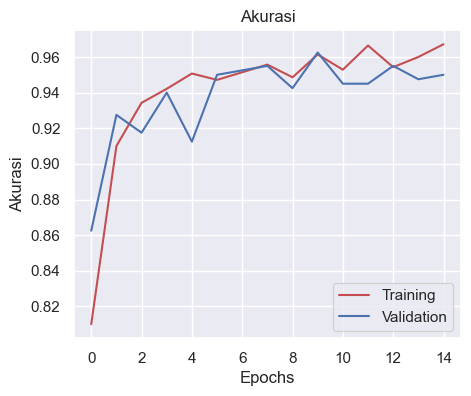

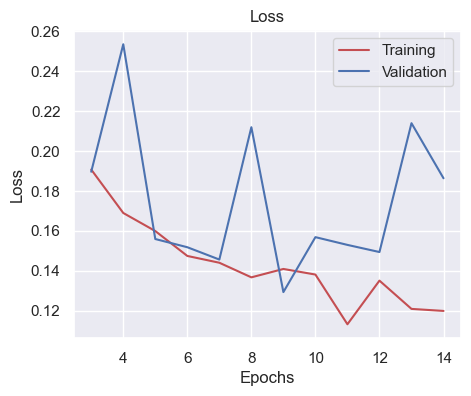

In [78]:
plt.figure(1, figsize=(5,4))
plt.plot(x_, y_acc_train, c='r', label='Training')
plt.plot(x_, y_acc_val, c='b', label='Validation')
plt.title('Akurasi')
plt.xlabel('Epochs')
plt.ylabel('Akurasi')
plt.legend()

plt.figure(2, figsize=(5,4))
plt.plot(x_[3:], y_loss_train[3:], c='r', label='Training')
plt.plot(x_[3:], y_loss_val[3:], c='b', label='Validation')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [79]:
#Evaluasi model menggunakan data testing

In [80]:
test_evaluate = model.evaluate(test_generator,verbose =0)

print(f'Test loss     : {test_evaluate[0]}')
print(f'Test accuracy : {round(test_evaluate[1],2)}')

Test loss     : 0.1630536913871765
Test accuracy : 0.94


In [81]:
#Simpan Model yang sudah di training

In [82]:
MODEL_BASE_PATH = "model"
SAVE_MODEL_NAME = "model.h5"
save_model_path = os.path.join(MODEL_BASE_PATH, SAVE_MODEL_NAME)
if os.path.exists(os.path.join(MODEL_BASE_PATH)) == False:
    os.makedirs(os.path.join(MODEL_BASE_PATH))
    
print('Saving Model At {}...'.format(save_model_path))
model.save(save_model_path,include_optimizer=False)

Saving Model At model\model.h5...


## Prediksi

In [116]:
result = model.predict(test_generator)
print(result)

7/7 [==============================] - 2s 165ms/step
[[4.0159439e-04]
 [9.9786186e-01]
 [9.9967980e-01]
 [9.9944323e-01]
 [6.0749305e-03]
 [9.2438512e-08]
 [9.8802733e-01]
 [9.9993759e-01]
 [9.9956208e-01]
 [5.5231282e-04]
 [9.9705267e-07]
 [4.2118307e-07]
 [9.9679869e-01]
 [9.9986154e-01]
 [9.9612099e-01]
 [9.8420233e-01]
 [1.4231443e-04]
 [9.8766375e-01]
 [9.9482781e-01]
 [9.9959213e-01]
 [3.6740780e-03]
 [8.9480239e-01]
 [9.9770772e-01]
 [2.2948942e-04]
 [9.6126175e-01]
 [2.1293987e-02]
 [1.8919662e-04]
 [1.9895649e-11]
 [9.9942935e-01]
 [9.9896014e-01]
 [9.9873185e-01]
 [9.9887371e-01]
 [9.6060547e-12]
 [9.9882907e-01]
 [8.7035313e-02]
 [1.2036546e-03]
 [9.9830097e-01]
 [7.2247320e-05]
 [9.9925601e-01]
 [4.8351203e-09]
 [5.3147215e-04]
 [9.9956268e-01]
 [9.9819952e-01]
 [9.9903411e-01]
 [9.9979389e-01]
 [1.4363097e-05]
 [9.4251984e-01]
 [9.9868059e-01]
 [1.2359702e-16]
 [2.0899463e-12]
 [8.9868289e-01]
 [3.1807267e-06]
 [5.1909640e-02]
 [9.9945265e-01]
 [9.9761474e-01]
 [9.9998623e

In [83]:
def predict_image(image_path):
    img = keras.preprocessing.image.load_img(image_path, target_size=[150,150])
    img_array = keras.preprocessing.image.img_to_array(img)

    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)
    score = predictions[0]
    print("This image is %.2f percent with mask and %.2f without mask." % (100 * (1 - score), 100 * score))
    plt.axis("Off")
    plt.imshow(img);

1/1 [==============================] - 0s 119ms/step
This image is 100.00 percent with mask and 0.00 without mask.


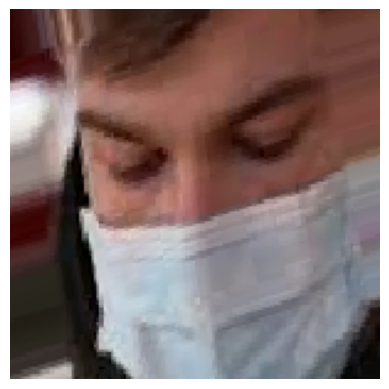

In [84]:
predict_image("./testing/54.png") 

1/1 [==============================] - 0s 71ms/step
This image is 0.00 percent with mask and 100.00 without mask.


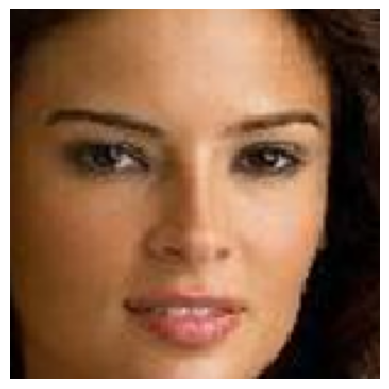

In [85]:
predict_image("./testing/1560.png") 

1/1 [==============================] - 0s 56ms/step
This image is 0.00 percent with mask and 100.00 without mask.


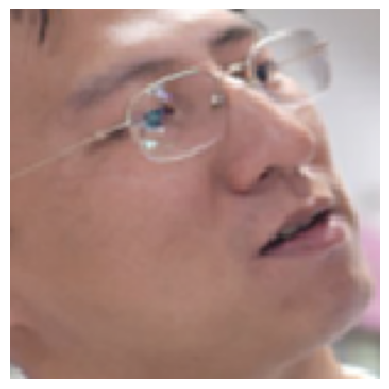

In [86]:
predict_image("./Dataset/test/without_mask/1563.png") 

1/1 [==============================] - 0s 59ms/step
This image is 100.00 percent with mask and 0.00 without mask.


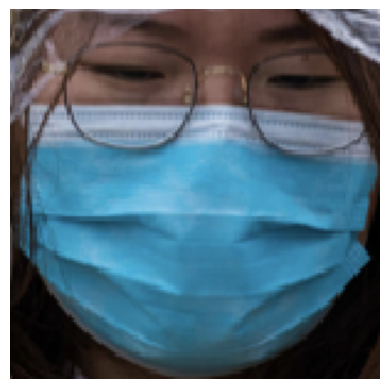

In [87]:
predict_image("./Dataset/test/with_mask/2363.png") 